<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II - R4001
# Trabajo semanal 10
#### Benjamín Ithurburu

## Introducción
En este notebook se abordarán la resolución de los ejercicios 1) y 2) de la TS10.

El primer ejercicio se centra en la síntesis de una impedancia $Z{(s)}$ dada, utilizando el método de Foster en derivación y los métodos de Cauer 1 y 2.

En el segundo ejercicio, se determinarán los valores de los componentes para una red específica, para la cual se proporciona su admitancia $Y{(s)}$ y una condición de resonancia.

In [45]:
from IPython.display import IFrame
IFrame("./Trabajo semanal 10.pdf", width=1000, height=1000)

## Simulación Python
A continuación se procede a instanciar funciones y configurar el entorno del notebook para su posterior uso en las simulaciones.

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# módulo de análisis simbólico
from sympy import *
init_printing(use_unicode=True)
import sympy as sp
# variable de Laplace
from sympy.abc import s

from pytc2.remociones import remover_polo_jw, remover_polo_infinito, remover_polo_dc
from pytc2.dibujar import display, dibujar_foster_derivacion, dibujar_cauer_LC, dibujar_tanque_derivacion, dibujar_puerto_entrada, dibujar_funcion_exc_abajo, dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor, Capacitor, Inductor, dibujar_elemento_derivacion, Drawing
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.sintesis_dipolo import foster, cauer_LC

# Configuración de parámetros para fijar estilo de gráficos en notebook. 
# Con el objetivo de que el tamaño de salida, sea adecuado al jubyter notebook.

#%% Inicialización de librerías

# Para eliminar bugs:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 14
fig_sz_y = 8
fig_dpi = 70
fig_front_size = 15

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_front_size})

#%% Fin - Inicialización de librerías

### Ejercicio 1 - Foster en derivación

<IPython.core.display.Math object>

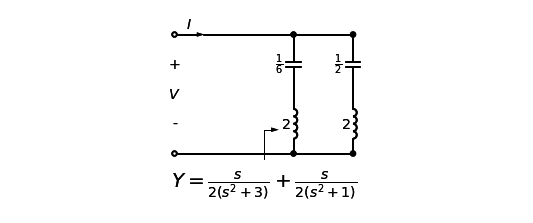

In [52]:
s = sp.symbols('s', complex=True)

ZZ = (s**4 + 4*s**2 + 3)/(s**3 + 2*s)
display(Math('Z(s) = ' + sp.latex(ZZ)))

k0, koo, ki_wi, kk, YLC_foster = foster(1/ZZ)
dibujar_foster_derivacion(k0 = k0, koo = koo, ki = ki_wi, y_exc = YLC_foster)

### Ejercicio 1 - Cauer I (remoción en alta frecuencia)

<IPython.core.display.Math object>

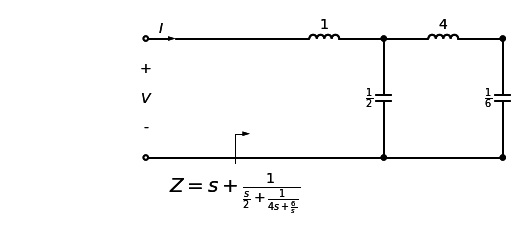

In [53]:
s = sp.symbols('s', complex=True)

ZZ = (s**4 + 4*s**2 + 3)/(s**3 + 2*s)
display(Math('Z(s) = ' + sp.latex(ZZ)))

koo, F_cauer_oo, rem = cauer_LC(ZZ, remover_en_inf=True)
# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(koo, z_exc = F_cauer_oo)

### Ejercicio 1 - Cauer II (remoción en DC)

<IPython.core.display.Math object>

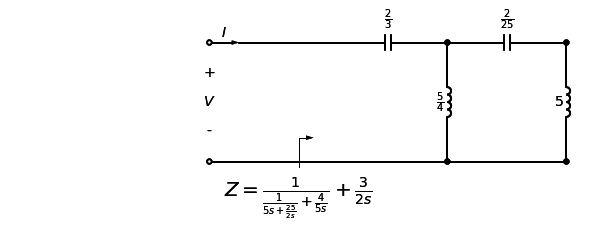

In [54]:
s = sp.symbols('s', complex=True)

ZZ = (s**4 + 4*s**2 + 3)/(s**3 + 2*s)
display(Math('Z(s) = ' + sp.latex(ZZ)))

ko, F_cauer_o, rem = cauer_LC(ZZ, remover_en_inf=False)
# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(ko, z_exc = F_cauer_o)

### Ejercicio 2

<IPython.core.display.Math object>

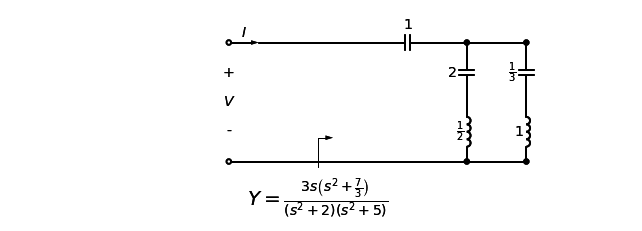

In [55]:
s = sp.symbols('s', complex=True)

YY = (3*s*(s**2 + sp.Rational(7,3)))/((s**2 + 2)*(s**2 + 5))
display(Math('Y(s) = ' + sp.latex(YY)))

omega_L2C2 = 1
Z2, Zc1 = remover_polo_dc(1/YY, omega_zero = omega_L2C2 )
C1 = 1/(s*Zc1)

Y4, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2)

omega_L3C3 = np.sqrt(3)
Y5, Yt3, L3, C3 = remover_polo_jw(Y4, isImpedance = False, omega = sp.sqrt(3))


d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, yy_lbl = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 YY, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Capacitor, C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_derivacion(d, L3, C3)

display(d)


## Simulación circuital

### Ejercicio #1

##### Ej_1: Esquemático síntesis Foster
<center><img src="./circuito_foster.png" width="1000"/></center>

##### Ej_1: Esquemático síntesis Cauer I (remoción en alta frecuencia)
<center><img src="./circuito_cauer_oo.png" width="1000"/></center>

##### Ej_1: Esquemático síntesis Cauer I (remoción en DC)
<center><img src="./circuito_cauer_o.png" width="1000"/></center>

##### Ej_1: Zin
<center><img src="./simulacion_ej1.png" width="1000"/></center>

\begin{equation}
\omega_{1} = 2\pi \cdot f_{1} = 2\pi \cdot 0.159 \, \text{Hz} \approx \sqrt{1}
\end{equation}

\begin{equation}
\omega_{2} = 2\pi \cdot f_{2} = 2\pi \cdot 0.225 \, \text{Hz} \approx \sqrt{2}
\end{equation}

\begin{equation}
\omega_{3} = 2\pi \cdot f_{3} = 2\pi \cdot 0.275 \, \text{Hz} \approx \sqrt{3}
\end{equation}

Se simularon los tres circuitos y tal como se esperaba, todos ellos arrojaron la misma impedancia de entrada $Z_{in}$. 
En el gráfico de la simulación, puede observarse como se cumple el diagráma de polos y ceros, encontrandose con los dos ceros en $\omega = 1$ y $\omega = \sqrt{3}$, y entre ellos un polo que levanta a la función en $\omega = \sqrt{2}$, además de los polos en continua y alta frecuencia. 

### Ejercicio #2

##### Ej_2: Esquemático
<center><img src="./circuito_ej2.png" width="1000"/></center>

##### Ej_2: Zin 
<center><img src="./simulacion_ej2.png" width="1000"/></center>

\begin{equation}
\omega_{1} = 2\pi \cdot f_{1} = 2\pi \cdot 0.225 \, \text{Hz} \approx \sqrt{2}
\end{equation}

\begin{equation}
\omega_{2} = 2\pi \cdot f_{2} = 2\pi \cdot 0.243 \, \text{Hz} \approx \sqrt{\frac{7}{3}}
\end{equation}

\begin{equation}
\omega_{3} = 2\pi \cdot f_{3} = 2\pi \cdot 0.355 \, \text{Hz} \approx \sqrt{5}
\end{equation}

A partir del gráfico de la simulación, puede observarse como en este caso también se cumple el diagráma de polos y ceros, encontrandose con los dos ceros en $\omega = \sqrt{2}$ y $\omega = \sqrt{5}$, y entre ellos un polo que levanta a la función en $\omega = \sqrt{\frac{7}{3}}$, además de los polos en continua y alta frecuencia.

## Conclusión

En las simulaciones circuitales se puede observar el comportamiento de las fases, las cuales son afectadas por los polos y ceros de la función de admitancia. Los polos en continua (DC) y en infinito contribuyen con $-90^\circ$ debido a que se consideran polos simples. Por otro lado, los polos y ceros intermedios aportan $-180^\circ$ y $+180^\circ$ respectivamente, ya que se tratan de pares de polos y ceros complejos conjugados.

Además, es relevante destacar la alternancia entre polos y ceros, que se deduce tanto del gráfico de módulo como del gráfico de fase. Esta alternancia confirma la consistencia de los resultados obtenidos en las síntesis y respeta la teoría necesaria para que se considere una inmitancia.